<a href="https://colab.research.google.com/github/Abdullah2020/Hamoye_StageC/blob/master/Hamoye_StageC_TagAlong_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electrical Grid Stability**




Hamoye Stage C Tag Along Project

In [1]:
#Import all necessary libraries

import pandas as pd
import numpy as np                            #mathematical operation
import matplotlib.pyplot as plt               #data visualisation
import seaborn as sns                         #data visualisation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler             #used for normalising dataset into a common scale using Min and Max.
from sklearn.model_selection import train_test_split       #used for splitting dataset into training and testing df

from sklearn.preprocessing import LabelEncoder
from pandas.core.common import random_state

import lightgbm as ltb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix 


print('Setup Completed!')

Setup Completed!


**Import dataset**

In [2]:
url = "https://raw.githubusercontent.com/Abdullah2020/Hamoye_StageC/master/Data_for_UCI_named.csv"
electric_df = pd.read_csv(url, sep=',')

In [3]:
electric_df.head().T

,0,1,2,3,4
tau1,2.95906,9.304097,8.971707,0.716415,3.134112
tau2,3.079885,4.902524,8.848428,7.6696,7.608772
tau3,8.381025,3.047541,3.046479,4.486641,4.943759
tau4,9.780754,1.369357,1.214518,2.340563,9.857573
p1,3.763085,5.067812,3.405158,3.963791,3.525811
p2,-0.782604,-1.940058,-1.207456,-1.027473,-1.125531
p3,-1.257395,-1.872742,-1.27721,-1.938944,-1.845975
p4,-1.723086,-1.255012,-0.920492,-0.997374,-0.554305
g1,0.650456,0.413441,0.163041,0.446209,0.79711
g2,0.859578,0.862414,0.766689,0.976744,0.45545


In [4]:
print("There are {} rows and {} columns in the dataset.".format(electric_df.shape[0], electric_df.shape[1]))

There are 10000 rows and 14 columns in the dataset.


In [5]:
#Let check missing values

missing_values = pd.DataFrame({'Count':electric_df.isna().sum(),'Percentage':electric_df.isna().sum()/len(electric_df)*100})
missing_values

,Count,Percentage
tau1,0,0.0
tau2,0,0.0
tau3,0,0.0
tau4,0,0.0
p1,0,0.0
p2,0,0.0
p3,0,0.0
p4,0,0.0
g1,0,0.0
g2,0,0.0


As indicated from the "***Instructions for Tag-Along Project***" the direct relationship between 'stab' and 'stabf' is that; 

*  'stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise!

Thus, **'stab' should be dropped** and 'stabf' will remain as the sole dependent variable (binary classification).

In [6]:
#to drop stab, we used .drop() method

electric_df.drop("stab", axis=1, inplace=True)

In [7]:
electric_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


**Further Instructions:**

*   Split the data into **80-20 train-test split** with a **random state of “1”**. 
*   Use the **standard scaler** to transform the train set (x_train, y_train) and the test set (x_test). 
*   Use scikit learn to train a random forest and extra trees classifier. 
*   And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. 

Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

In [8]:
#Let define our target and features variable

X = electric_df.drop("stabf", axis = 1)     # Features
y = electric_df["stabf"]                    # Target

In [9]:
#Split the data into an 80-20 train-test split with a random state of “1”

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)  # 80% training and 20% test

In [10]:
#Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test)

#Define standard scaler
scaler = StandardScaler()

#transform train set (x_train, y_train) 
transformed_train_df = scaler.fit_transform(x_train)
transformed_train_df = pd.DataFrame(transformed_train_df, columns = x_train.columns)

#transform test set (x_test)
transformed_test_df = scaler.transform(x_test)
transformed_test_df = pd.DataFrame(transformed_test_df,  columns = x_test.columns)


In [11]:
print(transformed_train_df.shape, transformed_test_df.shape)

(8000, 12) (2000, 12)


# **QUESTION 1:**

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [12]:
#Define Extra Trees Classifier model
extra_tree = ExtraTreesClassifier(random_state = 1)

#Parameters to try
param = {'n_estimators': [50, 100, 300, 500, 1000], 
         'min_samples_split': [2, 3, 5, 7, 9], 
         'min_samples_leaf': [1, 2, 4, 6, 8],
         'max_features': ['sqrt', 'log2', 'auto', None]    #It can take four values
         }

Random_Search = RandomizedSearchCV(estimator = extra_tree, param_distributions= param , random_state = 1, n_iter=10, cv=5, scoring="accuracy",
                                   n_jobs = -1, verbose = 1)

In [13]:
#Fit the model
RandomSearchResults = Random_Search.fit(transformed_train_df, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [14]:
#fetch the best hyperparameters

RandomSearchResults.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

# **Question 4:**

What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [15]:
#LightGBM classifier 

#define model
model = ltb.LGBMClassifier(random_state=1)

#fit model
model.fit(transformed_train_df, y_train)
print(); print(model)

#prediction
predicted_y = model.predict(transformed_test_df)


LGBMClassifier(random_state=1)


In [16]:
#LGBM classifier test set accuracy

accuracy = accuracy_score(y_test, predicted_y)
print("The LightGBM test set accuracy is:  ", round(accuracy, 4))

The LightGBM test set accuracy is:   0.9375


# **Question 9:**

What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [17]:
#Extreme Gradient Boost classifier (XGboost)

#Define model
xgb_model = XGBClassifier(random_state = 1)

#fit model
xgb_model.fit(transformed_train_df, y_train)

#prediction
xgb_predicted = xgb_model.predict(transformed_test_df)

In [18]:
#XGBoost accurarcy

xgb_accuracy = accuracy_score(y_test, xgb_predicted)

print("The XGboost test set accuracy is:  ", round(xgb_accuracy, 4))

The XGboost test set accuracy is:   0.9195


# **Question 10:**

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

[(0.11844468079199041, 'tau2'), (0.11739736493320078, 'tau1'), (0.11546569217199552, 'tau4'), (0.11316851246674982, 'tau3'), (0.09688268324346265, 'g3'), (0.09401881529815702, 'g4'), (0.09367635844551439, 'g2'), (0.08978290601483987, 'g1'), (0.040706278296424536, 'p3'), (0.040578638540044426, 'p4'), (0.04037131556379323, 'p2'), (0.039506754233827476, 'p1')]


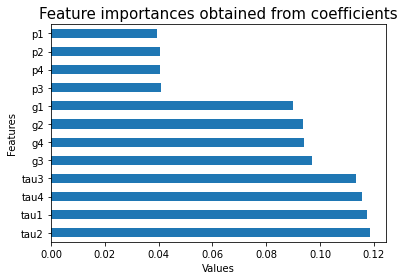

In [19]:
#Define Extra Trees Classifier model
extra_tree = ExtraTreesClassifier(random_state = 1)
extra_tree.fit(transformed_train_df, y_train)


X = pd.DataFrame(X)
print(sorted(zip(extra_tree.feature_importances_, X.columns), reverse=True))

feature_importance = pd.Series(extra_tree.feature_importances_, index = X.columns)
feature_importance.nlargest(40).plot(kind='barh')


plt.title('Feature importances obtained from coefficients', size=15)
plt.ylabel('Features')
plt.xlabel('Values')
plt.show()

In [20]:
feature_importance

tau1    0.117397
tau2    0.118445
tau3    0.113169
tau4    0.115466
p1      0.039507
p2      0.040371
p3      0.040706
p4      0.040579
g1      0.089783
g2      0.093676
g3      0.096883
g4      0.094019
dtype: float64

In [21]:
# find the maximum of each column
maxFeature = feature_importance.max(axis = 0)
 
print(maxFeature)

0.11844468079199041


Hence, the feature most important correspond with **tau2**

In [22]:
# find the minimum of each column
minFeature = feature_importance.min(axis = 0)
 
print(minFeature)

0.039506754233827476


Hence, the feature least important correspond with **p1**

# **Question 15:**

What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [23]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(transformed_train_df, y_train)

y_pred=clf.predict(transformed_test_df)

In [24]:
from sklearn import metrics

acc = accuracy_score(y_pred, y_test)

print("Accuracy:",round(acc,4))

Accuracy: 0.929


# **Question 17:**

You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 1700 examples in the test set. The confusion matrix of predicted class vs. actual class is:

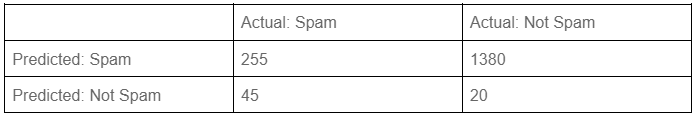

What is the F1 score of this classifier?


In [25]:
#It can be seen from the confusion matrix of predicted class vs. Actual class, the following parameters were obtained

TP = 255      #True Positive
FN = 1380     #False Negative
FP = 45       #False Positve
TN = 20       #True Negative

#let calculate Recall
Recall = TP/(TP+FN)

#let calculate Precision
Precision = TP/(TP+FP)

#let calculate F1 score
F1_Score = (2 * ((Recall*Precision)/(Recall+Precision)))


print("The F1 score of this classifier = {} ".format(round(F1_Score,4)))

The F1 score of this classifier = 0.2636 


# **Question 19:**

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [26]:
#1- The new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1)

#Define model
new_extra_model = ExtraTreesClassifier(random_state=1)

#fit model
new_extra_model.fit(transformed_train_df, y_train)

#Predict model
new_extra_predict = new_extra_model.predict(transformed_test_df)

In [27]:
#Let evaluate the accuracy score matrix

acc1 = accuracy_score(new_extra_predict, y_test)
print(round(acc1,4))

0.928


In [28]:
#2 - using the optimal model

#Define model
optimal_extra_model = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None, random_state=1)

#fit model
optimal_extra_model.fit(transformed_train_df, y_train)

#Predict model
optimal_extra_predict = optimal_extra_model.predict(transformed_test_df)

In [29]:
#Let evaluate the accuracy score matrix of the optimal model

acc2 = accuracy_score(optimal_extra_predict, y_test)
print(round(acc2,4))

0.927


In [30]:
#let see which of the accuracy from acc1 and acc2 is the highest and lowest

if acc1 < acc2:
  print("The accuracy of the new optimal model HIGHER than the initial ExtraTreesClassifier model with no hyperparameter tuning")
else:
  print("The accuracy of the new optimal model LOWER than the initial ExtraTreesClassifier model with no hyperparameter tuning")


The accuracy of the new optimal model LOWER than the initial ExtraTreesClassifier model with no hyperparameter tuning
